In [1]:
from PIL import Image
import os.path, sys
from skimage.io import imread, imshow
import cv2
from skimage import data, color, feature , exposure
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns; sns.set()
import glob
import os

from _helper_functions import resize_aspect_fit

In [5]:
test_data = pd.read_csv('/Users/toothless/Downloads/Thesis/data/test_labels/test_data_labels.csv')

In [6]:
path = '/Users/toothless/Downloads/Thesis/data/Train_Test/testoriginal/'

In [7]:
filename = test_data['new_names'].values

In [8]:
test_images = []

In [9]:
for file in filename:
    test_images.append(path+file)

In [11]:
test_re = []
final_size=150
for img in test_images:
    im = Image.open(img)
    f, e = os.path.splitext(img)
    size = im.size
    ratio = float(final_size) / max(size)
    new_image_size = tuple([int(x*ratio) for x in size])
    im = im.resize(new_image_size, Image.ANTIALIAS)
    new_im = Image.new("RGB", (final_size, final_size))
    new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
    test_re.append(np.asarray(new_im))

In [12]:
test_re = np.array(test_re)

In [13]:
test_re.shape

(1867, 150, 150, 3)

In [14]:
labels = test_data['labels']

In [15]:
features = np.reshape(test_re,(test_re.shape[0],150*150*3))

# save labels and features to dataframe and shuffle data
test_df = pd.DataFrame(features)
test_df['labels'] = labels

test_df  = test_df.sample(frac=1).reset_index(drop=True)

In [16]:
labels = test_df.pop('labels')
features = test_df.values

#reshape before saving
features = np.reshape(features,(features.shape[0],150,150,3))

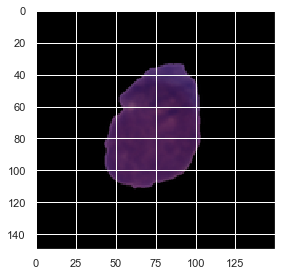

In [17]:
imshow(features[])

In [18]:
# Save test Features
np.savez_compressed('/Users/toothless/Downloads/Thesis/data/feat/Test_RAW_v1',features=features, labels=labels)